# Asset Mapping using YOLO8
Author: Lwam Teklay

### Introduction
The efficient monitoring and management of assets, especially in sectors like transportation, are crucial for ensuring safety, reliability, and operational efficiency. In this notebook, we present a solution utilizing YOLOv8, a state-of-the-art object detection algorithm, to perform asset mapping alongside railway tracks. Our aim is to demonstrate the feasibility of utilizing computer vision techniques, specifically object detection, for asset identification and mapping in scenarios where traditional methods may be impractical or insufficient.

Railway networks often cover vast distances, making manual asset inspection and mapping a time-consuming and labor-intensive task. To address this challenge, we make use of YOLOv8, an advanced deep learning model capable of detecting and localizing objects within images with remarkable accuracy and speed. In our specific context, we focus on identifying signs such as traffic lights and boards of different kinds situated alongside railway tracks. While the project primarily serves as a proof of concept, the methodology and framework laid out herein can be extended to encompass a broader range of assets and applications within the transportation domain.

To facilitate our experimentation, we make use of the Ultralytics library, a powerful toolkit that simplifies the implementation and deployment of deep learning models for object detection tasks.
Additionally, our dataset, labeled using Roboflow, provides the necessary annotated images for training and validation. Through this notebook, we aim to not only present our approach to asset mapping using YOLOv8 but also to provide comprehensive documentation and insights that enable others to adapt our work to their use cases.

As we move along, we delve into the details of our methodology, implementation, and results as we showcase the potential of YOLOv8 in revolutionizing asset mapping and inspection practices within the railway industry.

# Step 1: Importing Necessary Libraries and Initializing YOLO

Since we are working within the Google Colab environment, mounting Google Drive is a convenient way to access files and resources stored in your Google Drive account directly within the notebook. This eliminates the need for manual uploading and downloading of files, streamlining the workflow and enhancing collaboration.

In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


We proceed by installing Ultralytics, a powerful library designed for rapid machine learning model development in the field of computer vision. With Ultralytics, we can leverage its efficient tools and pre-built models to accelerate our project workflow. Additionally, Ultralytics simplifies model testing on mobile devices and facilitates deployment across various formats, enhancing the flexibility and efficiency of our asset mapping solution.

In [ ]:
!pip install ultralytics


We import essential libraries and initialize YOLO from Ultraltyics. Additionally, we import the operating system module to interact with the file system, and we utilize the IPython display functionality for image visualization within the notebook.


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

# Step 2: Prepare Dataset

With YOLO initialized and the environment configured, we're ready to set our data. We used Roboflow to label our dataset and exported it in the YOLOv8 format, ensuring compatibility with our chosen object detection algorithm.

To access our labeled dataset conveniently within our Google Colab environment, we make use of the Roboflow API key. This allows us to download the dataset directly into our notebook environment, facilitating seamless integration into our training pipeline.

In [4]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lGSy4ddz7jaQoJV4z7f3")
project = rf.workspace("asset-mapping-plcce").project("asset-mapping")
dataset = project.version(2).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.15, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Asset-Mapping-2 in yolov8:: 100%|██████████| 1806/1806 [00:00<00:00, 2560.16it/s]


To make sure we have the correct path, we open the data.yaml file as we can see below, because we're using this in a Google colab environment and we copy paste the right paths to the train and test sets. so that we would be able to run it directly in our Google collab notebook

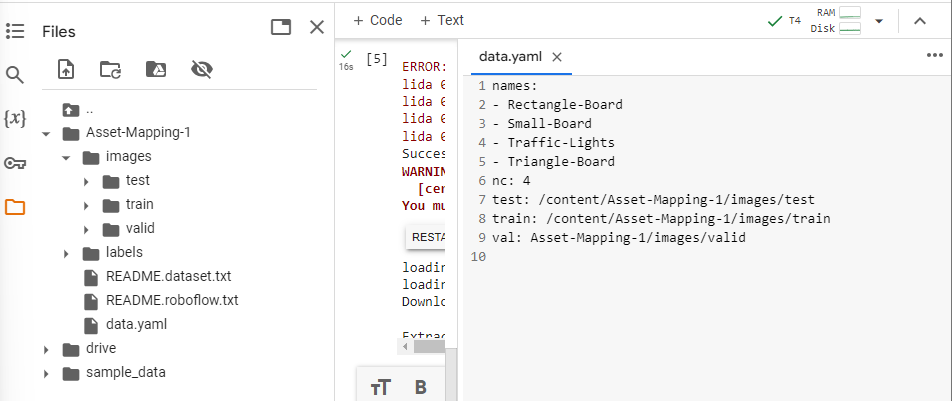

#Step 3: Training YOLOv8 Model

In this step, we initiate the training process for our YOLOv8 model using the specified parameters. The command below triggers the training procedure, where the YOLOv8 model is trained to detect objects based on the labeled dataset prepared in the previous step.

In the following command, we make use of the following parameters:


*   **Task:** We set the task for object detection.
*   **Mode:** We set the mode to train because we want to train our own custom YOLOv8 model.


*   **Data:** We specify the location of our dataset using the data.yaml file that we generated and edited in the previous step.
*   **Epochs:** We specify the number of training epochs, determining the number of times the entire dataset will be used to train the model.
*   **Image Size:** We set the size of the input images used for training. In this case, we chose an image size of 640x640.



In [8]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Asset-Mapping-2/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

We can take a look at the performance of our trained model above.
We observe class-wise metrics indicating the precision, recall, and mean average precision (mAP) at various thresholds (mAP50 and mAP50-95) for each class present in our data.


*Class-wise Performance:*




*   **Rectangle-Board:**
Precision = 0.81,
Recall = 0.807,
mAP50 = 0.842,
mAP50-95 = 0.325
*   **Small-Board:** Precision = 0.862, Recall = 0.8, mAP50 = 0.892, mAP50-95 = 0.384

*   **Traffic-Lights:** Precision = 0.771, Recall = 0.835, mAP50 = 0.864, mAP50-95 = 0.399

*   **Triangle-Board:** Precision = 0.774, Recall = 0.696, mAP50 = 0.696, mAP50-95 = 0.306

*Overall Performance (All Classes):*


*   **Precision (all):** 0.804
*   **Recall (all):** 0.784
*   **mAP50 (all):** 0.823
*   **mAP50-95 (all):** 0.354


These metrics provide insights into the model's ability to correctly identify objects (precision) and its coverage of the relevant objects in the dataset (recall). The mAP values indicate the model's performance in object detection across different thresholds, with higher values suggesting better detection accuracy. Overall, our trained model demonstrated promising performance in detecting the signs.



# Step 4: Visualizing Model Results and Confusion Matrix

In this step, we visualize the confusion matrix generated during the evaluation of our trained model. We can see that, besides the ones falling on the background, our model is doing a pretty good job.

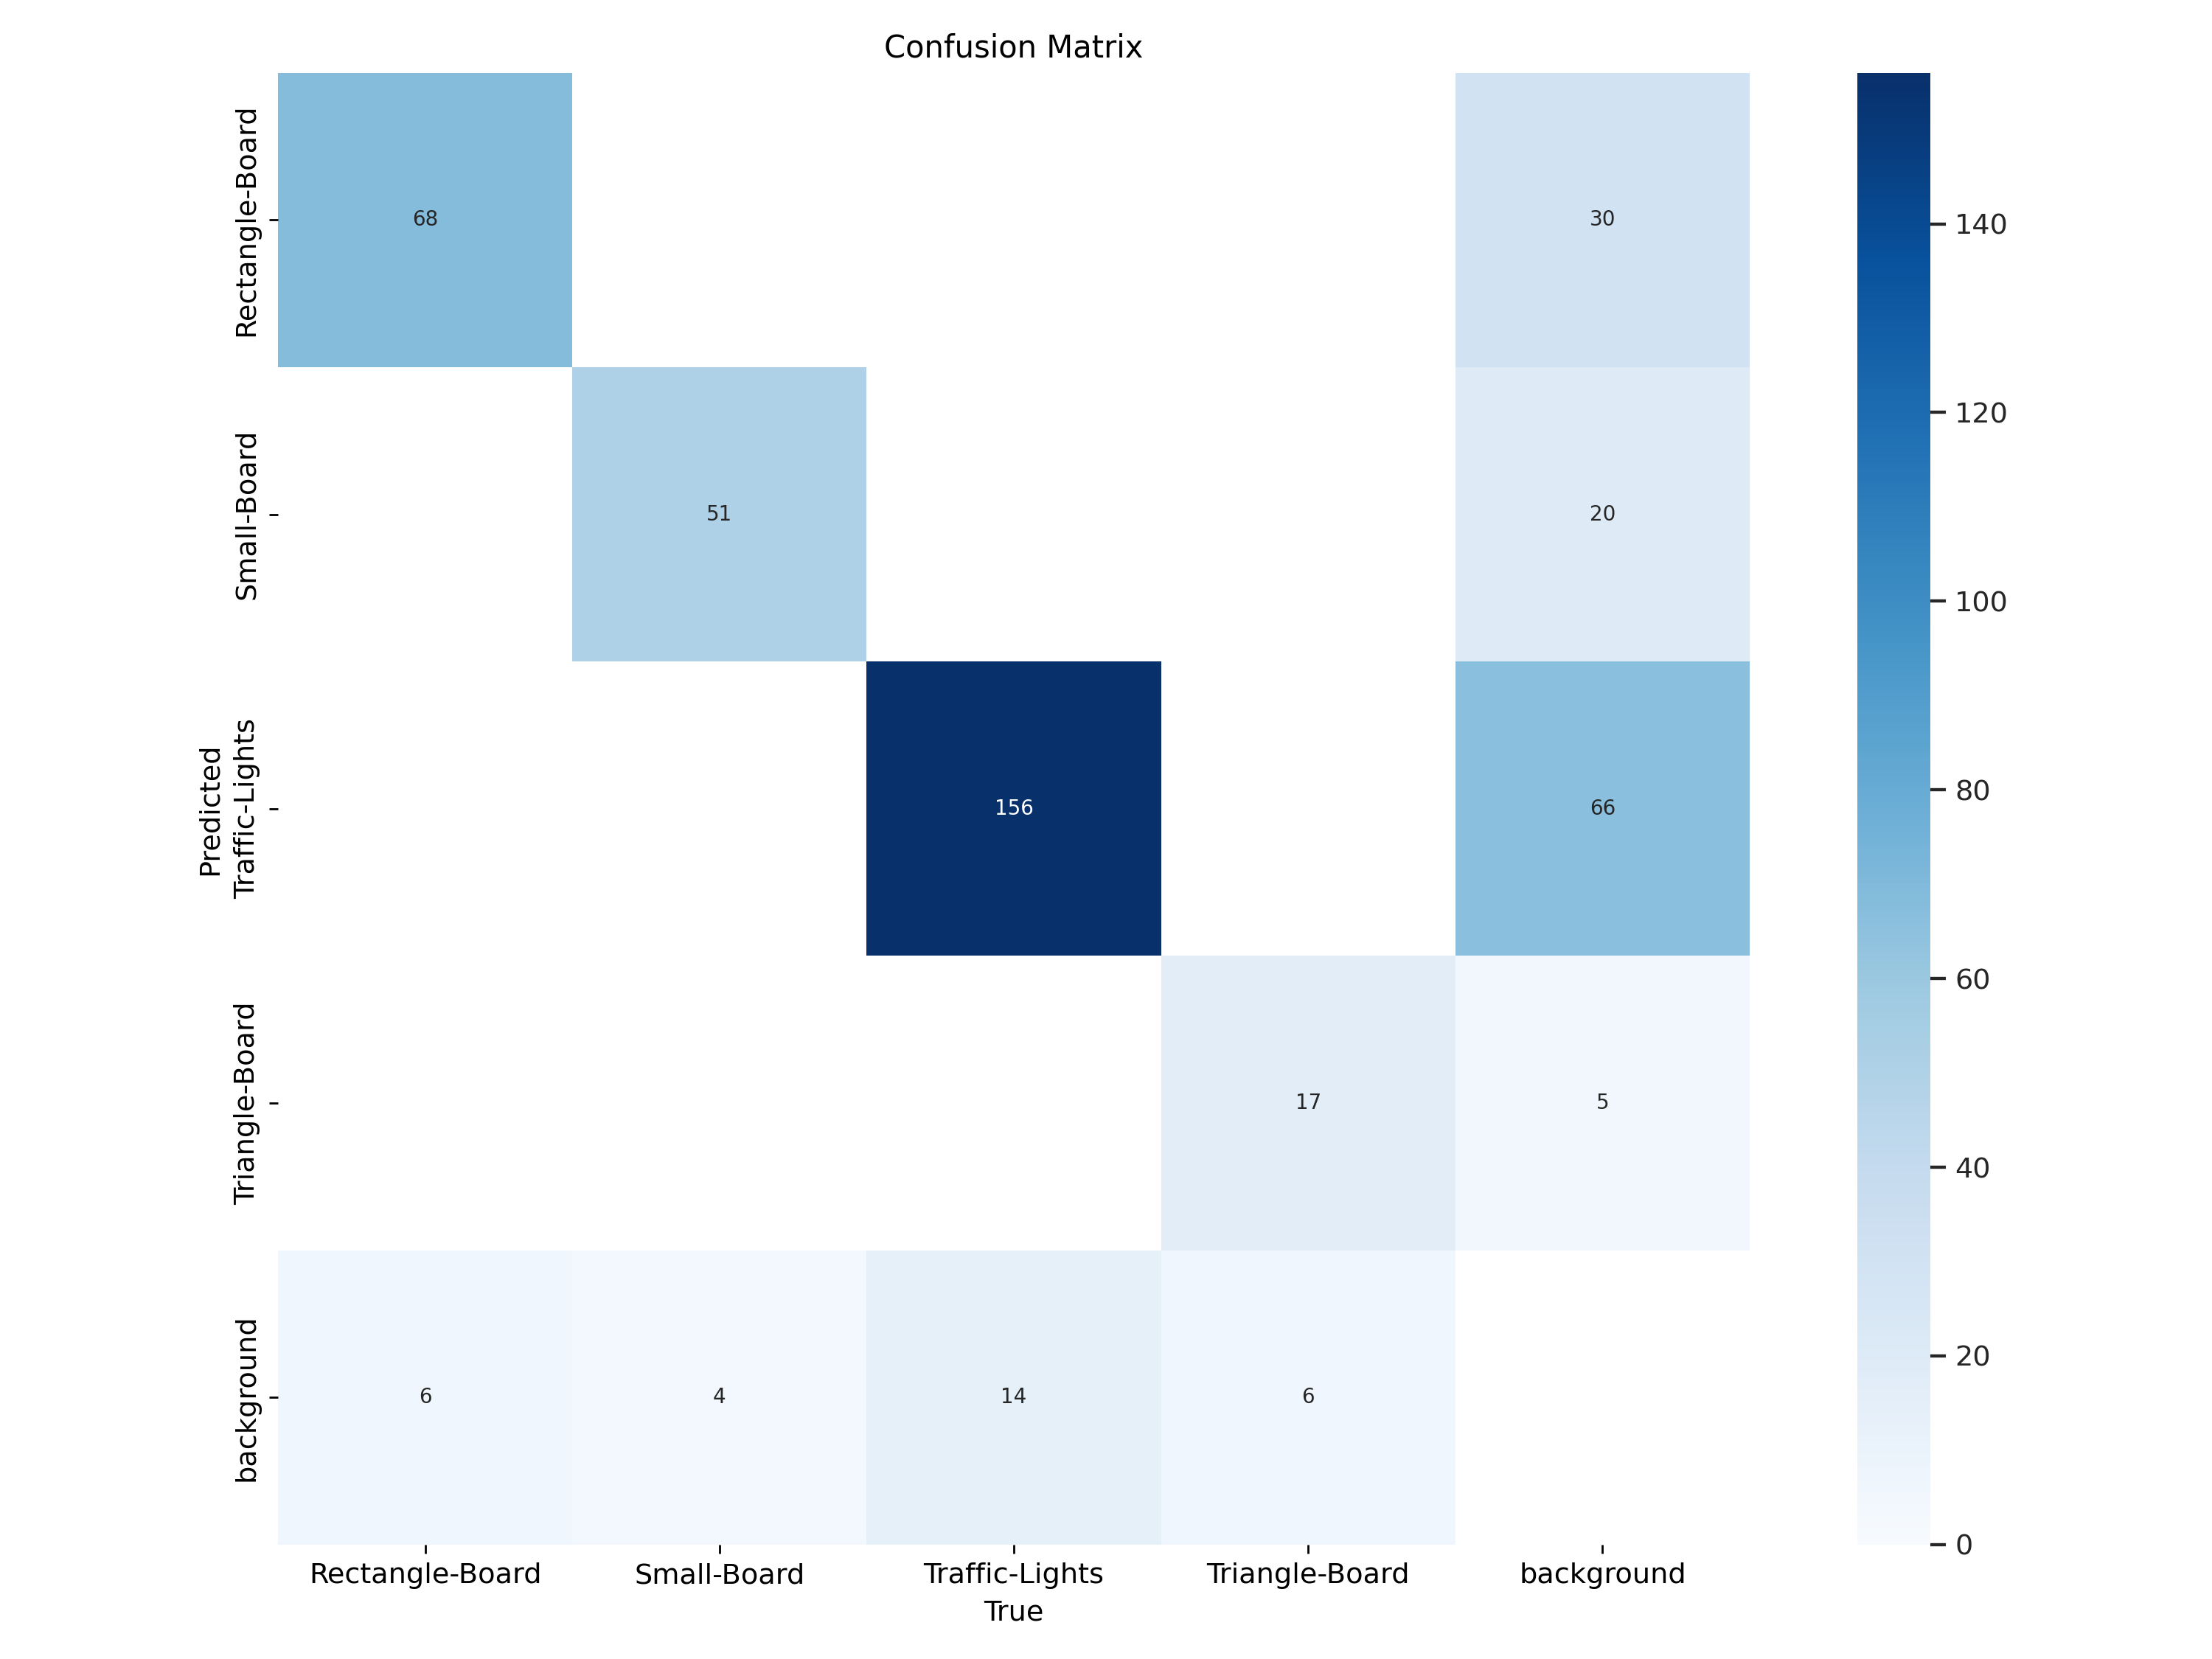

In [9]:

Image(filename=f'/content/runs/detect/train4/confusion_matrix.png', width = 600)

Next, we provide a visual representation of the model's predictions on the test dataset to gain further insights into the performance of the model.

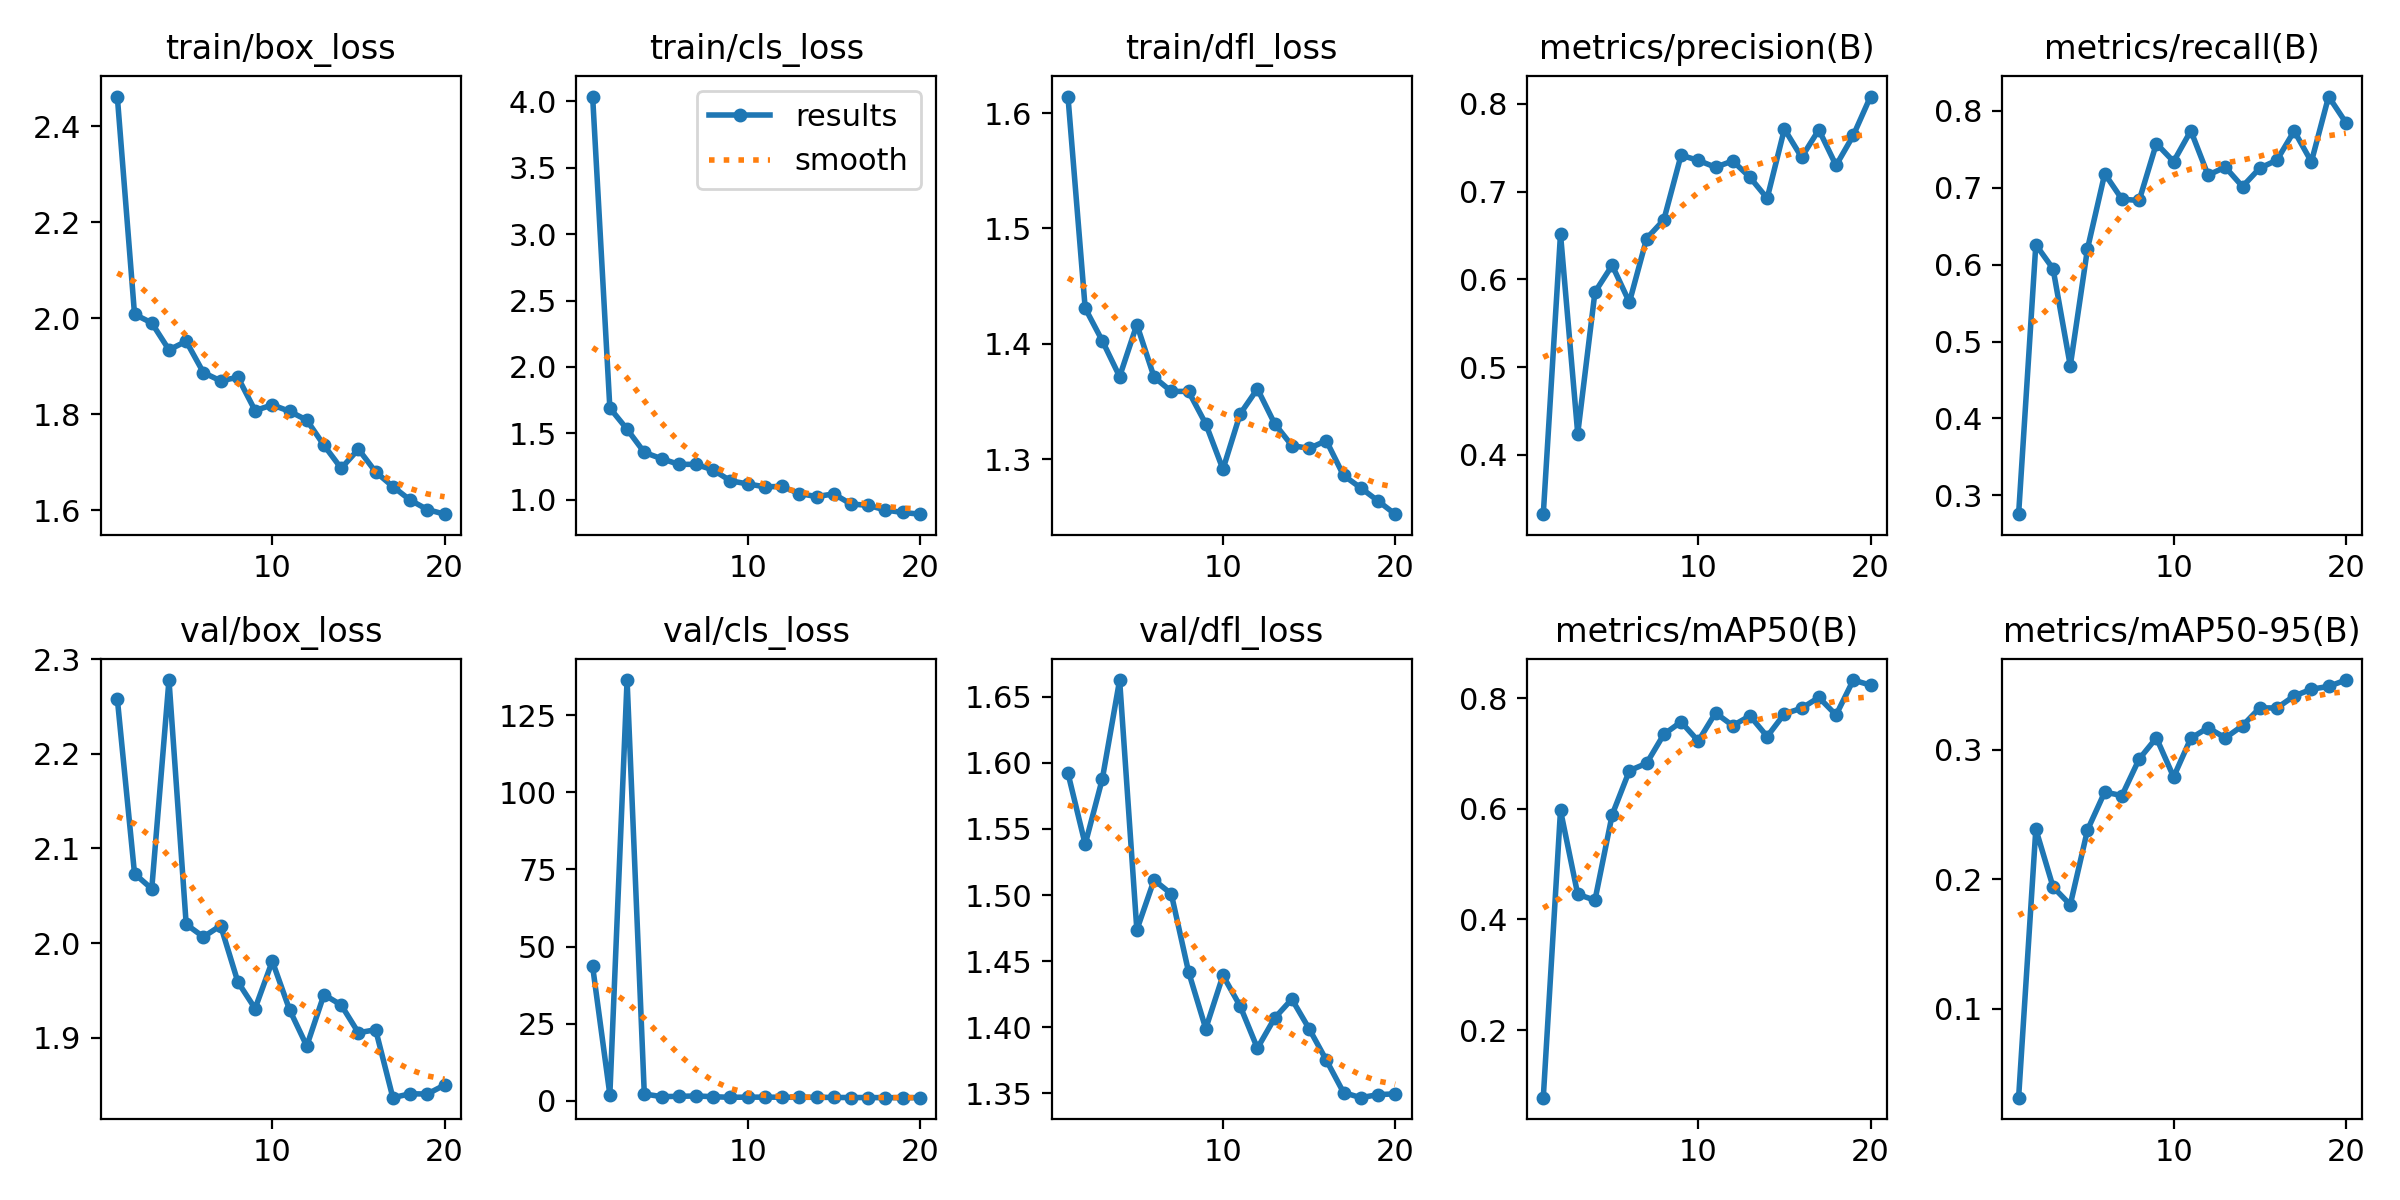

In [10]:

Image(filename=f'/content/runs/detect/train4/results.png', width = 600)

# Step 5: Performing Validation

In this step, we conduct validation to assess the performance of our trained model on unseen data.

*Explanation:*

To examine the validation results, we modify the mode to "val" and select the best-trained model. Subsequently, we specify the dataset location for our validation set. This enables our model to perform validation on data that wasn't included in the training dataset, providing insights into its generalization capabilities.


In [11]:

!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.15 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Asset-Mapping-2/valid/labels.cache... 179 images, 0 backgrounds, 0 corrupt: 100% 179/179 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:08<00:00,  1.47it/s]
                   all        179        322      0.812      0.784      0.829      0.357
       Rectangle-Board        179         74      0.821      0.807      0.843       0.33
           Small-Board        179         55      0.881        0.8      0.893      0.385
        Traffic-Lights        179        170      0.771      0.835      0.863      0.404
        Triangle-Board        179         23      0.774      0.696      0.717      0.308
Speed: 1.4ms preprocess, 14.3ms inference, 0.0ms loss, 9.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at 

In [ ]:

#!yolo task=detect mode=predict model=/content/runs/detect/train4/weights/best.pt conf=0.5 source='/content/drive/My Drive/VIDEO_2.mp4'

# Step 6: Loading and inferencing Model

Finally, we download the best.pt model from "/content/runs/detect/train4/weights/best.pt", and we save it somewhere(in my OneDrive here) so that we can load it at anytime for inference.

In [3]:
from ultralytics import YOLO
model = YOLO('/content/drive/My Drive/assetMapping.pt')

# Step 7: Performing Object Detection

Next, we perform object detection on a video file and specific frames using our pre-trained model to analyze the results.

In [ ]:

#!yolo task=detect mode=predict model=/content/drive/My Drive/assetMapping.pt conf=0.5 source='/content/drive/My Drive/VIDEO_2.mp4'

In [4]:

results = model(source = 'VIDEO_2_frame_0124.jpg', conf=0.5, save=True)


image 1/1 /content/VIDEO_2_frame_0124.jpg: 384x640 1 Small-Board, 2 Triangle-Boards, 72.3ms
Speed: 11.3ms preprocess, 72.3ms inference, 707.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Finally, we display the object detection result for visual inspection.

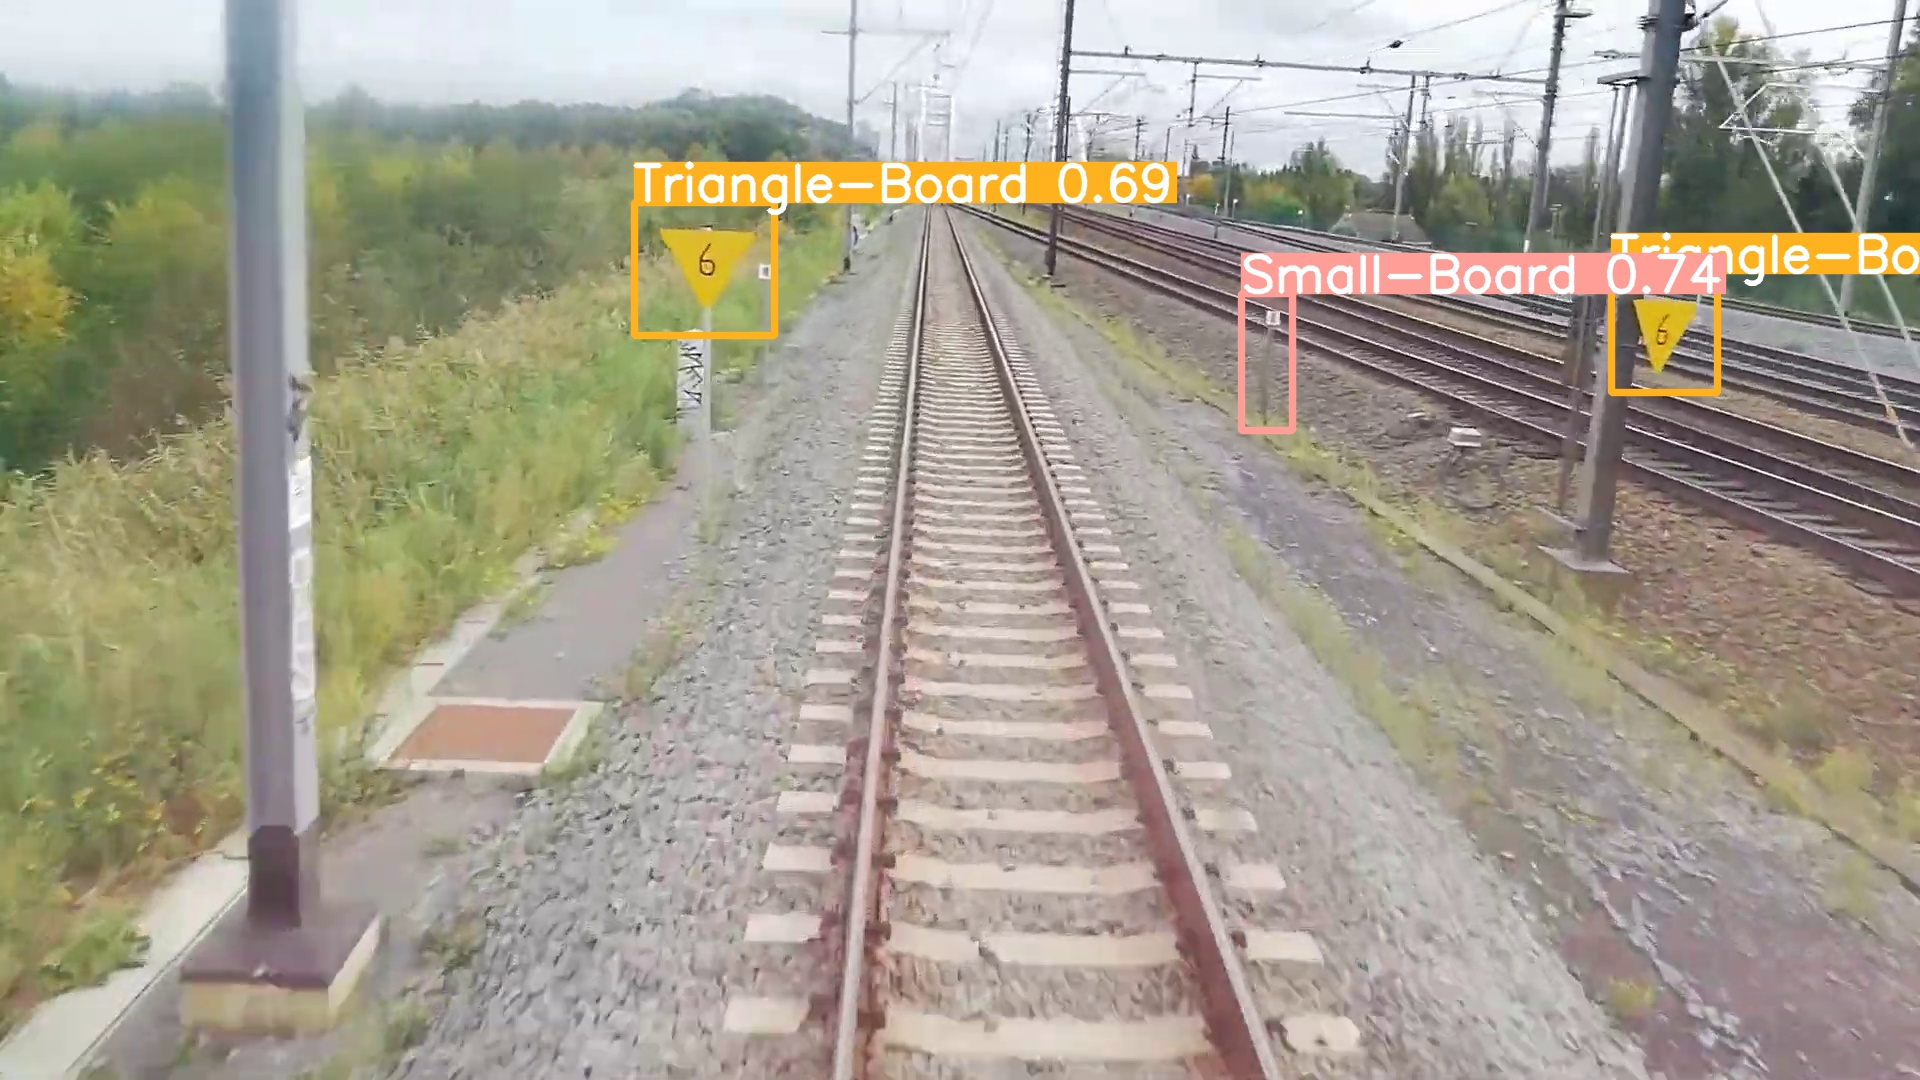

In [5]:
from IPython.display import Image, display
image_path = '/content/runs/detect/predict/VIDEO_2_frame_0124.jpg'
display(Image(filename=image_path, height=600))


# Step 8: Conclusion

In this notebook, we worked on developing an asset mapping solution using the YOLOv8 object detection algorithm. Leveraging the capabilities of Ultralytics and Roboflow, we prepared our dataset, annotated objects of interest along railway tracks, and trained a custom YOLOv8 model to detect these assets.

Through a series of steps, we imported the necessary libraries, initialized YOLO, prepared our dataset using Roboflow, and trained our model. We evaluated the model's performance, assessing class-wise metrics and visualizing the confusion matrix to gain insights into its classification accuracy.

Furthermore, we conducted validation to gauge the model's generalization capabilities on unseen data and performed object detection on video files, demonstrating the practical applicability of our trained model.

On top of the successful development of a robust asset mapping solution capable of accurately detecting objects of interest alongside the railway tracks, the model showed promising performance metrics and demonstrated its aplicability in real-world scenarios.

As we conclude this journey, we acknowledge the potential for further refinement and optimization. Continued experimentation, fine-tuning, and integration of advanced techniques can enhance the model's performance and broaden its applicability in asset mapping and beyond.

Overall, this notebook serves as a testament to the power of machine learning and computer vision in solving real-world challenges, paving the way for innovative solutions in asset management and infrastructure monitoring.